In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/CloudWatch_Usage_With_Timestamp_Full (1).csv')

In [3]:
df.head()

,Timestamp,CPUUtilization,NetworkIn_MB,NetworkOut_MB,DiskReadBytes_MB,DiskWriteBytes_MB,DiskReadOps,DiskWriteOps,StatusCheckFailed,EBSBurstBalance_MB,...,EBSConsumedReadOps,EBSConsumedWriteOps,EBSConsumedIOs,EBSConsumedReadBytes_MB,EBSConsumedWriteBytes_MB,MemoryUtilization,DiskQueueLength,Latency_ms,RunningProcesses,ActiveConnections
0,2/17/2025 0:00,14.46,1.85,9.89,0.62,3.81,196,276,0,51.06,...,283,244,527,4.16,7.55,10.36,0.14,25.04,19,26
1,2/17/2025 0:05,21.26,8.65,31.07,1.29,3.08,131,214,0,80.06,...,284,179,464,6.61,9.49,17.49,0.86,4.38,24,91
2,2/17/2025 0:10,16.76,7.49,9.82,0.95,3.01,162,279,0,74.07,...,128,187,315,4.85,5.77,14.88,0.51,21.49,24,51
3,2/17/2025 0:15,21.65,17.48,21.36,1.22,9.57,63,358,0,40.32,...,263,379,642,5.99,4.55,15.67,0.20,6.93,26,56
4,2/17/2025 0:20,21.75,19.28,11.39,1.76,3.70,261,159,0,93.46,...,234,133,367,9.89,2.40,13.42,0.96,24.67,24,62


In [4]:
df.isna().sum()

,0
Timestamp,0
CPUUtilization,0
NetworkIn_MB,0
NetworkOut_MB,0
DiskReadBytes_MB,0
DiskWriteBytes_MB,0
DiskReadOps,0
DiskWriteOps,0
StatusCheckFailed,0
EBSBurstBalance_MB,0


In [5]:
df.columns

Index(['Timestamp', 'CPUUtilization', 'NetworkIn_MB', 'NetworkOut_MB',
       'DiskReadBytes_MB', 'DiskWriteBytes_MB', 'DiskReadOps', 'DiskWriteOps',
       'StatusCheckFailed', 'EBSBurstBalance_MB', 'EBSVolumeReadBytes_MB',
       'EBSVolumeWriteBytes_MB', 'EBSVolumeReadOps', 'EBSVolumeWriteOps',
       'EBSVolumeTotalIOs', 'EBSConsumedReadOps', 'EBSConsumedWriteOps',
       'EBSConsumedIOs', 'EBSConsumedReadBytes_MB', 'EBSConsumedWriteBytes_MB',
       'MemoryUtilization', 'DiskQueueLength', 'Latency_ms',
       'RunningProcesses', 'ActiveConnections'],
      dtype='object')

In [6]:
df.size

403300

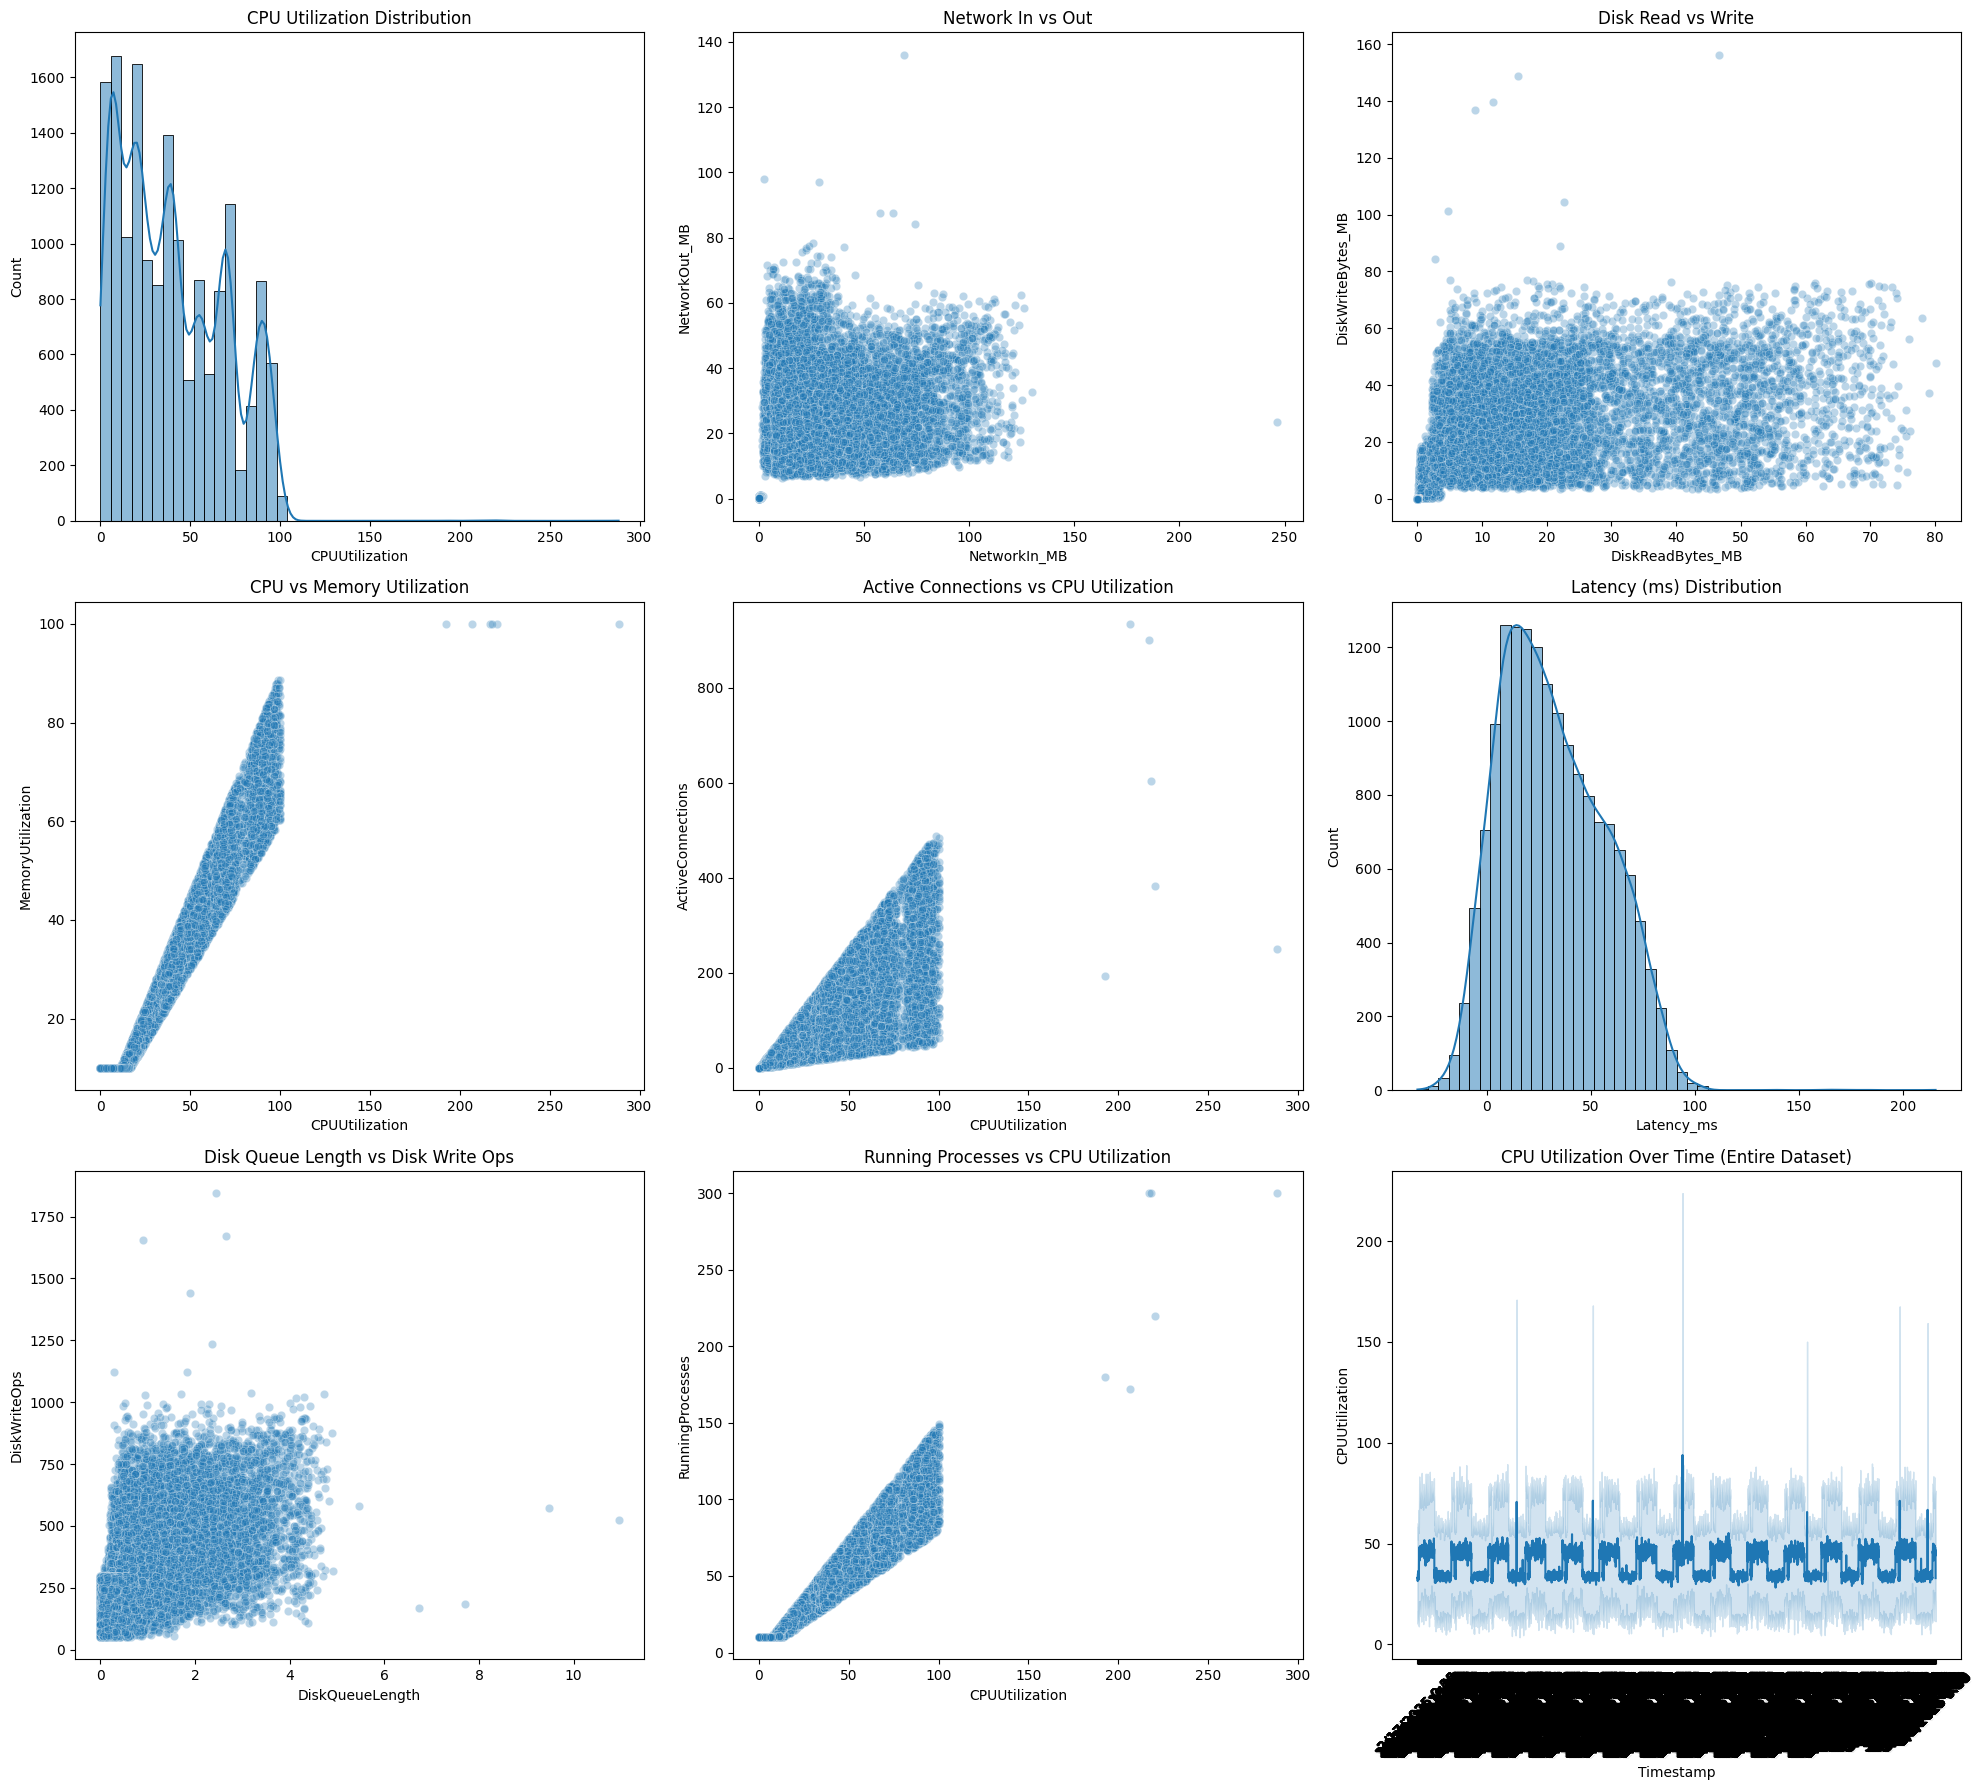

In [7]:
full_df = df

instance_full = full_df[full_df['Timestamp'].notna()].sort_values('Timestamp')

fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

sns.histplot(data=full_df, x='CPUUtilization', bins=50, kde=True, ax=axes[0])
axes[0].set_title('CPU Utilization Distribution')

sns.scatterplot(data=full_df, x='NetworkIn_MB', y='NetworkOut_MB', alpha=0.3, ax=axes[1])
axes[1].set_title('Network In vs Out')

sns.scatterplot(data=full_df, x='DiskReadBytes_MB', y='DiskWriteBytes_MB', alpha=0.3, ax=axes[2])
axes[2].set_title('Disk Read vs Write')

sns.scatterplot(data=full_df, x='CPUUtilization', y='MemoryUtilization', alpha=0.3, ax=axes[3])
axes[3].set_title('CPU vs Memory Utilization')

sns.scatterplot(data=full_df, x='CPUUtilization', y='ActiveConnections', alpha=0.3, ax=axes[4])
axes[4].set_title('Active Connections vs CPU Utilization')

sns.histplot(data=full_df, x='Latency_ms', bins=50, kde=True, ax=axes[5])
axes[5].set_title('Latency (ms) Distribution')

sns.scatterplot(data=full_df, x='DiskQueueLength', y='DiskWriteOps', alpha=0.3, ax=axes[6])
axes[6].set_title('Disk Queue Length vs Disk Write Ops')

sns.scatterplot(data=full_df, x='CPUUtilization', y='RunningProcesses', alpha=0.3, ax=axes[7])
axes[7].set_title('Running Processes vs CPU Utilization')

sns.lineplot(data=instance_full, x='Timestamp', y='CPUUtilization', ax=axes[8])
axes[8].set_title('CPU Utilization Over Time (Entire Dataset)')
axes[8].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

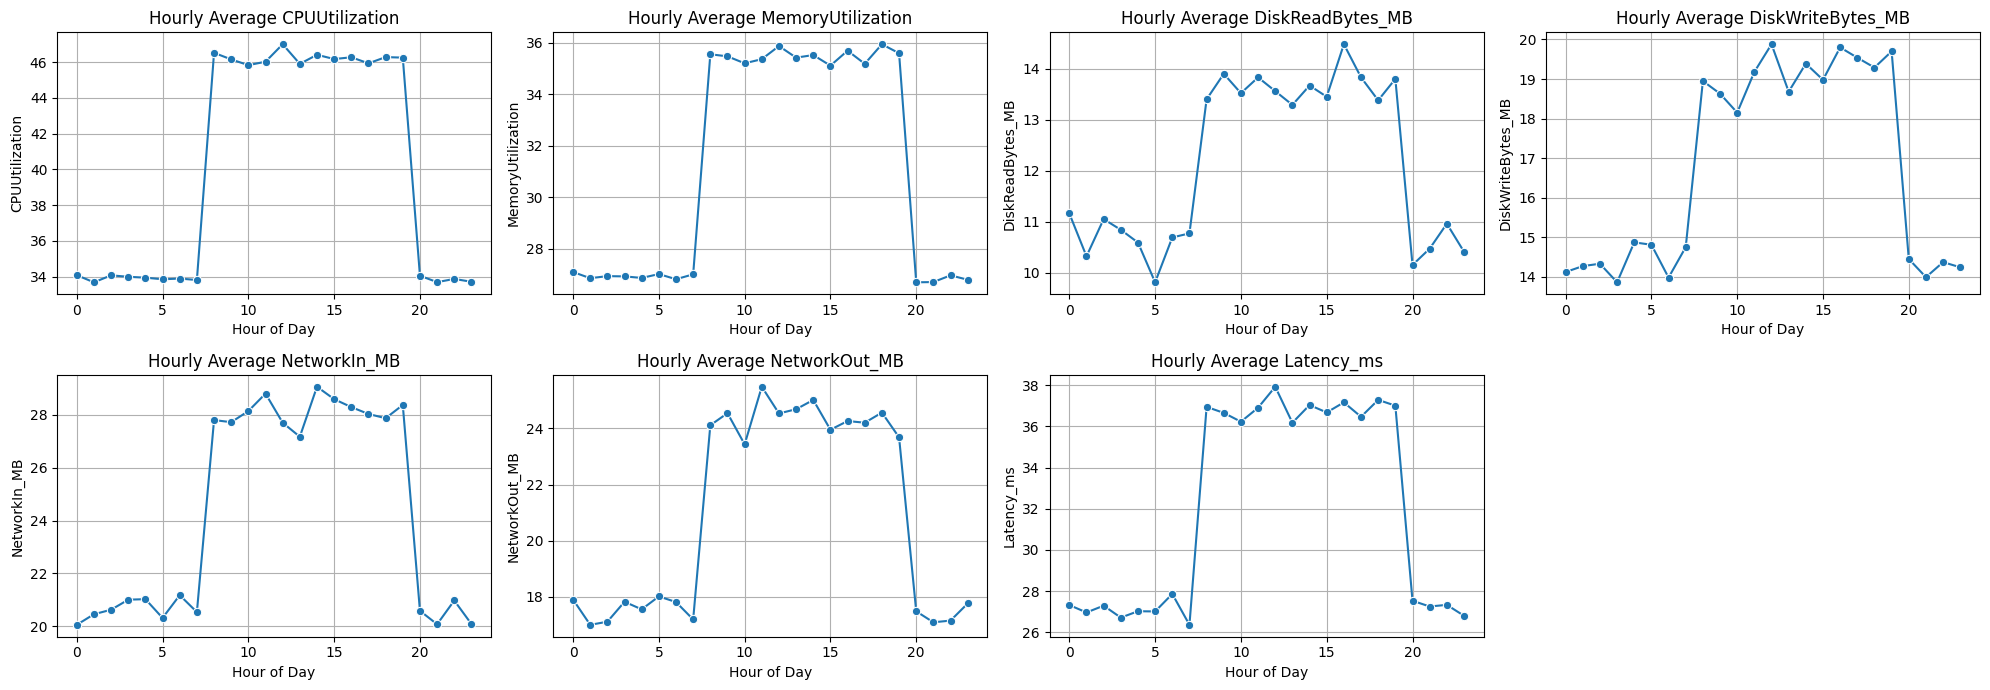

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Hour'] = df['Timestamp'].dt.hour

features_to_plot = [
    'CPUUtilization', 'MemoryUtilization', 'DiskReadBytes_MB', 'DiskWriteBytes_MB',
    'NetworkIn_MB', 'NetworkOut_MB', 'Latency_ms', 'ActiveConnections'
]

hourly_avg = df.groupby('Hour')[features_to_plot].mean().round(2)

fig, axes = plt.subplots(2, 4, figsize=(20, 7))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.lineplot(data=hourly_avg, x=hourly_avg.index, y=feature, marker="o", ax=axes[i])
    axes[i].set_title(f'Hourly Average {feature}')
    axes[i].set_xlabel("Hour of Day")
    axes[i].set_ylabel(feature)
    axes[i].grid(True)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

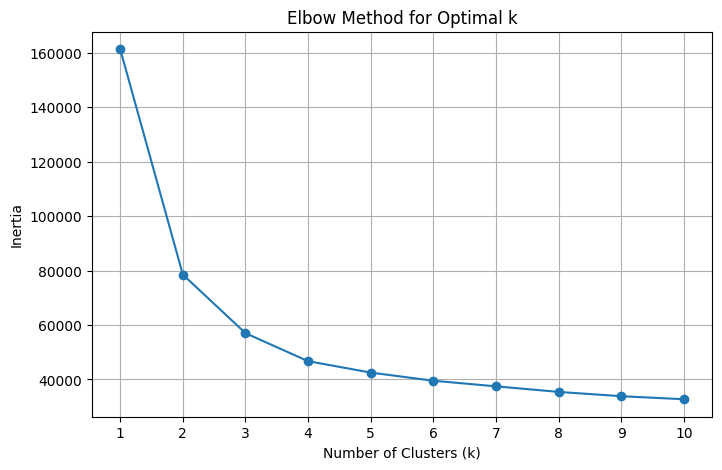

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Features for clustering
features = [
    'CPUUtilization', 'MemoryUtilization', 'DiskReadBytes_MB', 'DiskWriteBytes_MB',
    'NetworkIn_MB', 'NetworkOut_MB', 'Latency_ms', 'DiskQueueLength',
    'RunningProcesses', 'ActiveConnections'
]

# Standardize the feature data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Calculate inertia for k = 1 to 10
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.xticks(k_range)
plt.show()

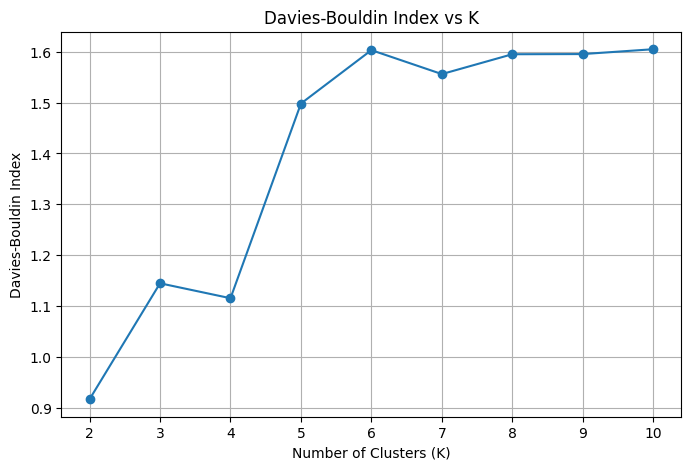

Optimal K (lowest DBI): 2 with DBI = 0.9169


In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define features
features = [
    'CPUUtilization', 'MemoryUtilization', 'DiskReadBytes_MB', 'DiskWriteBytes_MB',
    'NetworkIn_MB', 'NetworkOut_MB', 'Latency_ms', 'DiskQueueLength',
    'RunningProcesses', 'ActiveConnections'
]

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Range of K values to test
k_values = range(2, 11)
dbi_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    dbi = davies_bouldin_score(scaled_data, labels)
    dbi_scores.append(dbi)

# Plot DBI vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, dbi_scores, marker='o')
plt.title('Davies-Bouldin Index vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Print best K
best_k = k_values[np.argmin(dbi_scores)]
print(f"Optimal K (lowest DBI): {best_k} with DBI = {min(dbi_scores):.4f}")

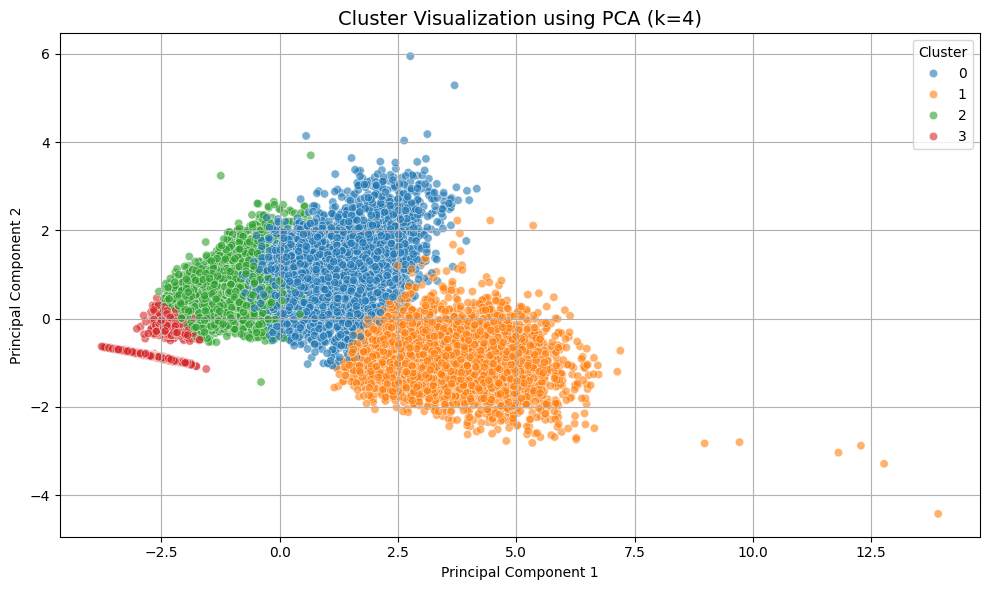

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = [
    'CPUUtilization', 'MemoryUtilization', 'DiskReadBytes_MB', 'DiskWriteBytes_MB',
    'NetworkIn_MB', 'NetworkOut_MB', 'Latency_ms', 'DiskQueueLength',
    'RunningProcesses', 'ActiveConnections'
]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
df['ClusterLabel'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='PCA1', y='PCA2',
    hue='ClusterLabel',
    palette='tab10',
    alpha=0.6
)
plt.title('Cluster Visualization using PCA (k=4)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
import numpy as np

wcss_per_cluster = []

for i in range(kmeans.n_clusters):
    cluster_points = scaled_data[kmeans_labels == i]
    centroid = kmeans.cluster_centers_[i]
    # Sum of squared distances within the cluster
    variance = np.sum((cluster_points - centroid) ** 2)
    wcss_per_cluster.append(variance)

print("Variance (WCSS) per cluster:", wcss_per_cluster)


Variance (WCSS) per cluster: [np.float64(14104.526896708274), np.float64(24462.89121751928), np.float64(6284.541567939539), np.float64(1854.910903733489)]


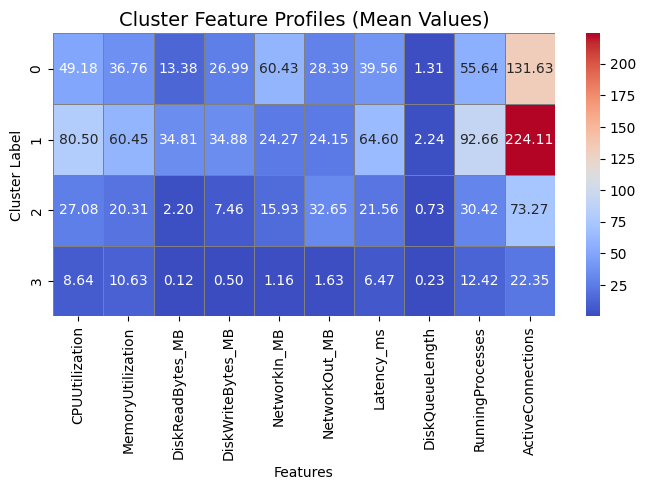

In [13]:
# Profile cluster feature means
cluster_profile_kmeans = df.groupby('ClusterLabel')[features].mean().round(2)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cluster_profile_kmeans,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Cluster Feature Profiles (Mean Values)', fontsize=14)
plt.ylabel('Cluster Label')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [14]:
cluster_profile_kmeans = df.groupby('ClusterLabel')[features].mean().round(2)
cluster_profile_kmeans

,CPUUtilization,MemoryUtilization,DiskReadBytes_MB,DiskWriteBytes_MB,NetworkIn_MB,NetworkOut_MB,Latency_ms,DiskQueueLength,RunningProcesses,ActiveConnections
ClusterLabel,,,,,,,,,,
0,49.18,36.76,13.38,26.99,60.43,28.39,39.56,1.31,55.64,131.63
1,80.50,60.45,34.81,34.88,24.27,24.15,64.60,2.24,92.66,224.11
2,27.08,20.31,2.20,7.46,15.93,32.65,21.56,0.73,30.42,73.27
3,8.64,10.63,0.12,0.50,1.16,1.63,6.47,0.23,12.42,22.35


In [15]:
# Count the number of records in each cluster
cluster_sizes = df['ClusterLabel'].value_counts().sort_index()
print(cluster_sizes)

ClusterLabel
0    3818
1    3895
2    3916
3    4503
Name: count, dtype: int64


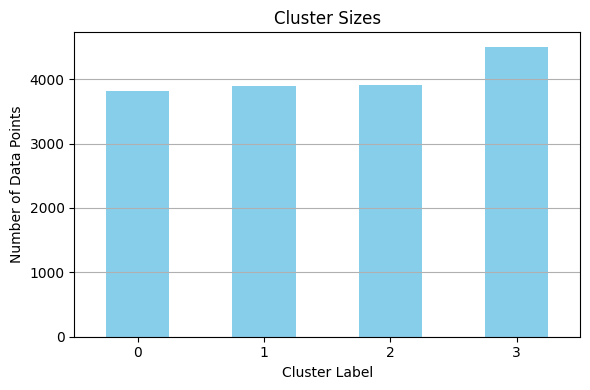

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
cluster_sizes.plot(kind='bar', color='skyblue')
plt.title('Cluster Sizes')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances
from itertools import combinations

results = []

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Inverse transform to get original scale for interpretation
original_data = scaler.inverse_transform(scaled_data)
original_df = pd.DataFrame(original_data, columns=features)

eps_values = np.linspace(0.05,2,num=10)
min_samples_values = [10,20,40,80,160,500,1000]

for eps in eps_values:
    for min_samples in min_samples_values:
        try:
            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels = db.fit_predict(scaled_data)
            df['DBSCAN_Label'] = labels
            original_df['DBSCAN_Label'] = labels

            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)

            if n_clusters > 1:
                # Silhouette on scaled data
                valid_idx = labels != -1
                score = silhouette_score(scaled_data[valid_idx], labels[valid_idx])

                # Cluster centroids (on original data for behavior)
                cluster_means = original_df[labels != -1].groupby('DBSCAN_Label')[features].mean()

                # Behavior separation = average pairwise distance between cluster centers
                pairwise_dist = pairwise_distances(cluster_means)
                upper_triangle = pairwise_dist[np.triu_indices_from(pairwise_dist, k=1)]
                behavior_separation = np.mean(upper_triangle)
            else:
                score = -1
                behavior_separation = -1

            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'silhouette_score': round(score, 4),
                'behavior_separation': round(behavior_separation, 4)
            })

        except Exception as e:
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': None,
                'n_noise': None,
                'silhouette_score': -1,
                'behavior_separation': -1,
                'error': str(e)
            })

# Create and sort DataFrame
behavior_df = pd.DataFrame(results).sort_values(by='behavior_separation', ascending=False)
print(behavior_df)

         eps  min_samples  n_clusters  n_noise  silhouette_score  \
43  1.350000           20           3     1188            0.3122   
35  1.133333           10           5     2081            0.1424   
37  1.133333           40           2     5137            0.3897   
28  0.916667           10          10     5511            0.3513   
31  0.916667           80           2     7833            0.3916   
..       ...          ...         ...      ...               ...   
65  2.000000           40           1       21           -1.0000   
66  2.000000           80           1       24           -1.0000   
67  2.000000          160           1       62           -1.0000   
68  2.000000          500           1      854           -1.0000   
69  2.000000         1000           1     2558           -1.0000   

    behavior_separation  
43             247.7020  
35             119.7799  
37             113.0269  
28             110.3821  
31              78.6124  
..                  ...  
6

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Define clustering features
features = [
    'CPUUtilization', 'MemoryUtilization', 'DiskReadBytes_MB', 'DiskWriteBytes_MB',
    'NetworkIn_MB', 'NetworkOut_MB', 'Latency_ms', 'DiskQueueLength',
    'RunningProcesses', 'ActiveConnections'
]

# Scale the feature data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Run DBSCAN
dbscan = DBSCAN(eps=1.1333, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)
df['DBSCAN_Label'] = dbscan_labels

# Filter out noise
valid_clusters = df[df['DBSCAN_Label'] != -1]

# Count clusters and noise
num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_noise_dbscan = list(dbscan_labels).count(-1)

# Calculate silhouette score
if num_clusters_dbscan > 1:
    silhouette = silhouette_score(scaled_data[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
else:
    silhouette = None

# Profile DBSCAN clusters
cluster_profile_dbscan = valid_clusters.groupby('DBSCAN_Label')[features].mean().round(2)
cluster_profile_dbscan

,CPUUtilization,MemoryUtilization,DiskReadBytes_MB,DiskWriteBytes_MB,NetworkIn_MB,NetworkOut_MB,Latency_ms,DiskQueueLength,RunningProcesses,ActiveConnections
DBSCAN_Label,,,,,,,,,,
0,33.07,26.05,8.61,13.45,22.98,19.74,26.31,0.90,38.32,89.19
1,57.93,45.46,10.90,50.71,41.61,53.53,41.25,0.82,68.40,199.80
2,87.24,68.31,38.87,53.63,18.05,14.85,76.57,2.34,96.55,280.91
3,89.02,70.65,60.41,40.90,33.33,22.41,72.05,1.67,115.73,242.18
4,83.84,63.58,21.68,51.88,29.07,13.38,79.65,0.99,109.00,210.00


In [18]:
# Count number of data points in each cluster label (including noise as -1)
dbscan_cluster_sizes = df['DBSCAN_Label'].value_counts().sort_index()
print(dbscan_cluster_sizes)

DBSCAN_Label
-1     2081
 0    14015
 1        5
 2       11
 3       11
 4        9
Name: count, dtype: int64


In [20]:
# Count of noise points (label = -1)
num_noise_points = (df['DBSCAN_Label'] == -1).sum()
print("Number of noise points (outliers):", num_noise_points)

Number of noise points (outliers): 2081


In [21]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd

# Step 1: Standardize data
features = [
    'CPUUtilization', 'MemoryUtilization', 'DiskReadBytes_MB', 'DiskWriteBytes_MB',
    'NetworkIn_MB', 'NetworkOut_MB', 'Latency_ms', 'DiskQueueLength',
    'RunningProcesses', 'ActiveConnections'
]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Step 2: Run KMeans and DBSCAN
kmeans_labels = KMeans(n_clusters=4, random_state=42).fit_predict(scaled_data)
dbscan_labels = DBSCAN(eps=1.13333, min_samples=10).fit_predict(scaled_data)

max_label = dbscan_labels.max()
dbscan_labels = np.where(dbscan_labels == -1, max_label + 1, dbscan_labels)

label_stack = np.vstack((kmeans_labels, dbscan_labels)).T

# Step 4: Meta-clustering on label stack (e.g., with KMeans)
ensemble_labels = KMeans(n_clusters=9, random_state=42).fit_predict(label_stack)

# Step 5: Assign final cluster to DataFrame
df['KMeans_DBSCAN_Ensemble'] = ensemble_labels

# Optional: Measure agreement
print("Adjusted Rand Index (KMeans vs Ensemble):", adjusted_rand_score(kmeans_labels, ensemble_labels))
print("Adjusted Rand Index (DBSCAN vs Ensemble):", adjusted_rand_score(dbscan_labels, ensemble_labels))

Adjusted Rand Index (KMeans vs Ensemble): 0.8996219734389473
Adjusted Rand Index (DBSCAN vs Ensemble): 0.14998662683992314


In [22]:
label_stack_df=pd.DataFrame(label_stack)

In [23]:
label_stack_df.sample(5)

,0,1
7571,2,0
14848,3,0
3124,2,0
5449,0,0
483,2,0


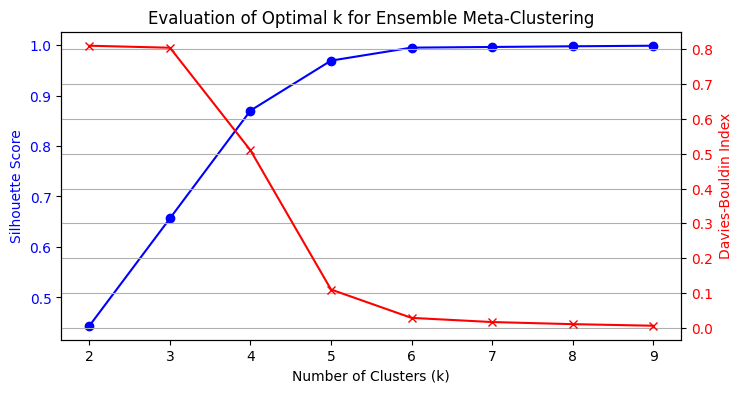

Best k by Silhouette Score: 9 (score = 0.9986)


In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# One-hot encode the label stack to treat clustering labels as categorical
encoder = OneHotEncoder(sparse_output=False)
label_stack_encoded = encoder.fit_transform(label_stack)

# Try a range of k values
k_range = range(2, 10)
sil_scores = []
dbi_scores = []

for k in k_range:
    kmeans_meta = KMeans(n_clusters=k, random_state=42).fit(label_stack_encoded)
    ensemble_k = kmeans_meta.labels_

    sil = silhouette_score(label_stack_encoded, ensemble_k)
    dbi = davies_bouldin_score(label_stack_encoded, ensemble_k)

    sil_scores.append(sil)
    dbi_scores.append(dbi)

# Plot both scores
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Silhouette Score', color='blue')
ax1.plot(k_range, sil_scores, marker='o', color='blue', label='Silhouette Score')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Davies-Bouldin Index', color='red')
ax2.plot(k_range, dbi_scores, marker='x', color='red', label='DBI')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Evaluation of Optimal k for Ensemble Meta-Clustering')
plt.grid(True)
plt.show()

# Print best k by silhouette score
best_k = k_range[np.argmax(sil_scores)]
print(f"Best k by Silhouette Score: {best_k} (score = {max(sil_scores):.4f})")

In [25]:
# Cluster profile
df.groupby('KMeans_DBSCAN_Ensemble')[features].mean().round(2)

,CPUUtilization,MemoryUtilization,DiskReadBytes_MB,DiskWriteBytes_MB,NetworkIn_MB,NetworkOut_MB,Latency_ms,DiskQueueLength,RunningProcesses,ActiveConnections
KMeans_DBSCAN_Ensemble,,,,,,,,,,
0,27.06,20.29,2.20,7.45,15.93,32.63,21.54,0.73,30.39,73.23
1,89.48,67.60,37.75,38.93,27.43,27.57,71.90,2.52,103.47,250.40
2,48.48,36.23,13.19,26.49,58.94,27.66,38.89,1.30,54.84,128.93
3,8.64,10.63,0.12,0.50,1.16,1.63,6.47,0.23,12.42,22.35
4,71.98,53.63,31.89,30.87,21.29,21.18,57.57,1.99,82.30,199.09
5,60.51,45.30,16.44,35.05,84.54,40.21,50.35,1.62,68.66,175.36
6,87.24,68.31,38.87,53.63,18.05,14.85,76.57,2.34,96.55,280.91
7,89.02,70.65,60.41,40.90,33.33,22.41,72.05,1.67,115.73,242.18
8,83.84,63.58,21.68,51.88,29.07,13.38,79.65,0.99,109.00,210.00


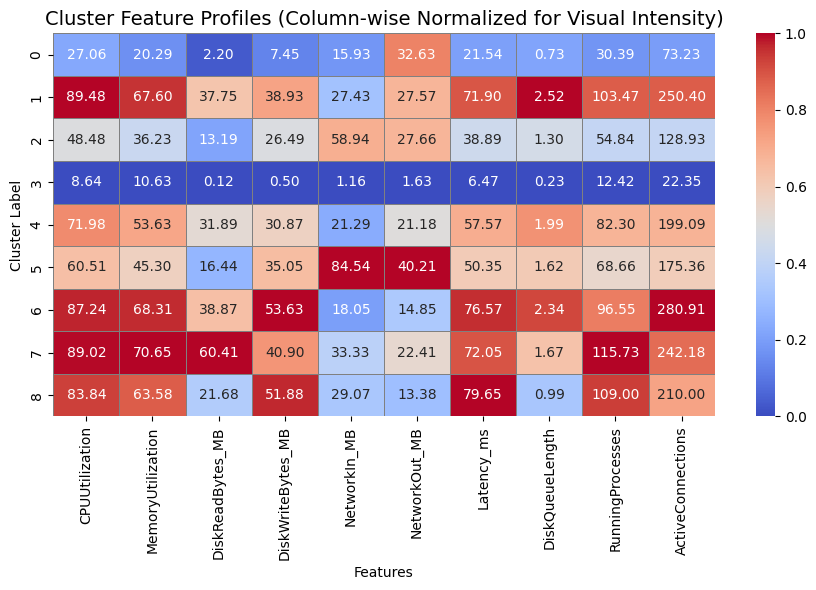

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

cluster_profile = df.groupby('KMeans_DBSCAN_Ensemble')[features].mean()

# Normalize each column independently
normalized_profile = cluster_profile.copy()
for col in normalized_profile.columns:
    col_min = normalized_profile[col].min()
    col_max = normalized_profile[col].max()
    normalized_profile[col] = (normalized_profile[col] - col_min) / (col_max - col_min)

# Plot heatmap with independent color intensities per feature
plt.figure(figsize=(9, 6))
sns.heatmap(
    normalized_profile,
    annot=cluster_profile.round(2),
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Cluster Feature Profiles (Column-wise Normalized for Visual Intensity)', fontsize=14)
plt.ylabel('Cluster Label')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [27]:
# Count the number of data points in each ensemble cluster
cluster_sizes = df['KMeans_DBSCAN_Ensemble'].value_counts().sort_index()
print(cluster_sizes)

KMeans_DBSCAN_Ensemble
0    3910
1    1859
2    3596
3    4503
4    2011
5     222
6      11
7      11
8       9
Name: count, dtype: int64


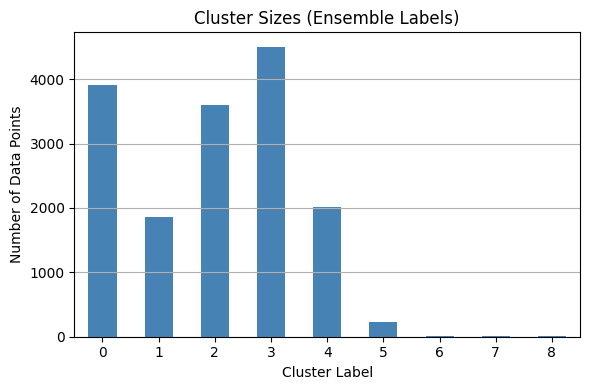

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
cluster_sizes.plot(kind='bar', color='steelblue')
plt.title('Cluster Sizes (Ensemble Labels)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Hierarchial Clustering

In [29]:
from scipy.cluster.hierarchy import linkage
linkage_matrix = linkage(scaled_data, method='ward')

In [30]:
linkage_matrix

array([[1.27300000e+04, 1.38330000e+04, 0.00000000e+00, 2.00000000e+00],
       [1.35370000e+04, 1.37690000e+04, 0.00000000e+00, 2.00000000e+00],
       [1.36140000e+04, 1.54350000e+04, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.22420000e+04, 3.22560000e+04, 1.50375802e+02, 8.05700000e+03],
       [3.22580000e+04, 3.22590000e+04, 2.05804580e+02, 8.07500000e+03],
       [3.22600000e+04, 3.22610000e+04, 4.02574061e+02, 1.61320000e+04]])

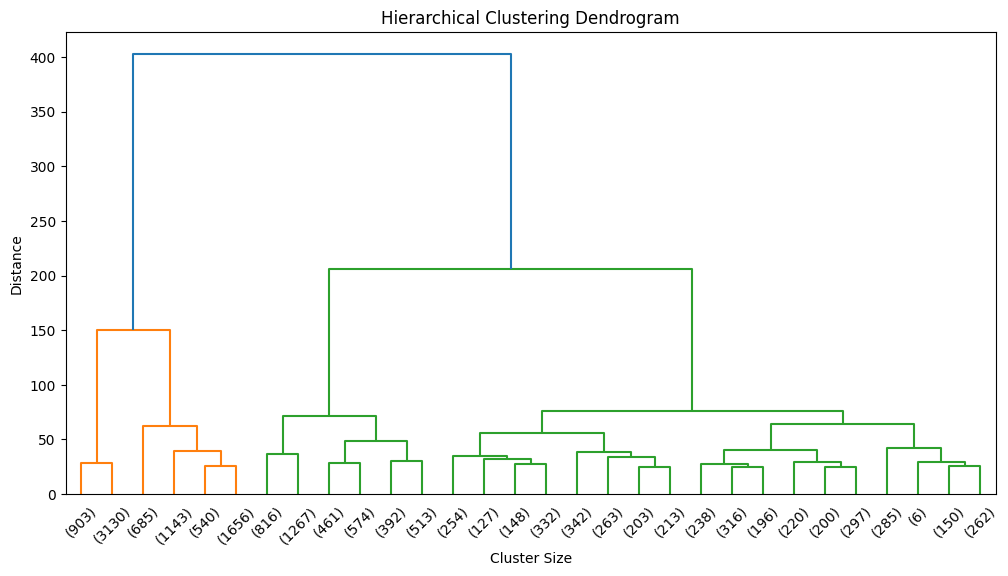

In [31]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [32]:
from scipy.cluster.hierarchy import fcluster
df['HierarchicalCluster_maxclust'] = fcluster(linkage_matrix, t=4, criterion='maxclust')

In [33]:
cluster_profile_hier1 = df.groupby('HierarchicalCluster_maxclust')[features].mean().round(2)
cluster_profile_hier1


,CPUUtilization,MemoryUtilization,DiskReadBytes_MB,DiskWriteBytes_MB,NetworkIn_MB,NetworkOut_MB,Latency_ms,DiskQueueLength,RunningProcesses,ActiveConnections
HierarchicalCluster_maxclust,,,,,,,,,,
1,7.59,10.33,0.02,0.02,0.23,0.23,5.94,0.21,11.59,20.02
2,24.94,18.75,1.40,6.43,13.77,31.11,19.77,0.68,28.02,67.99
3,47.50,35.57,13.12,26.28,59.31,28.55,38.10,1.29,53.88,127.99
4,80.01,59.96,33.88,34.22,24.17,23.87,64.02,2.19,91.83,220.58


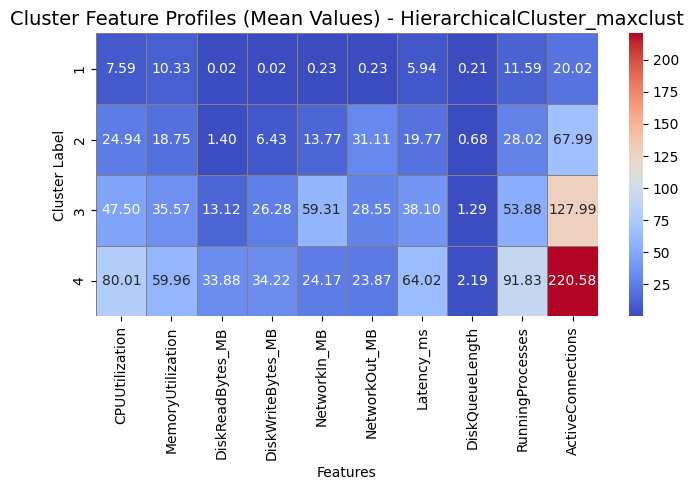

In [34]:
plt.figure(figsize=(7, 5))
sns.heatmap(
    cluster_profile_hier1,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Cluster Feature Profiles (Mean Values) - HierarchicalCluster_maxclust', fontsize=14)
plt.ylabel('Cluster Label')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [35]:
df['HierarchicalCluster_distance'] = fcluster(linkage_matrix, t=80, criterion='distance')

In [36]:
cluster_profile_hier2 = df.groupby('HierarchicalCluster_distance')[features].mean().round(2)
cluster_profile_hier2

,CPUUtilization,MemoryUtilization,DiskReadBytes_MB,DiskWriteBytes_MB,NetworkIn_MB,NetworkOut_MB,Latency_ms,DiskQueueLength,RunningProcesses,ActiveConnections
HierarchicalCluster_distance,,,,,,,,,,
1,7.59,10.33,0.02,0.02,0.23,0.23,5.94,0.21,11.59,20.02
2,24.94,18.75,1.40,6.43,13.77,31.11,19.77,0.68,28.02,67.99
3,47.50,35.57,13.12,26.28,59.31,28.55,38.10,1.29,53.88,127.99
4,80.01,59.96,33.88,34.22,24.17,23.87,64.02,2.19,91.83,220.58


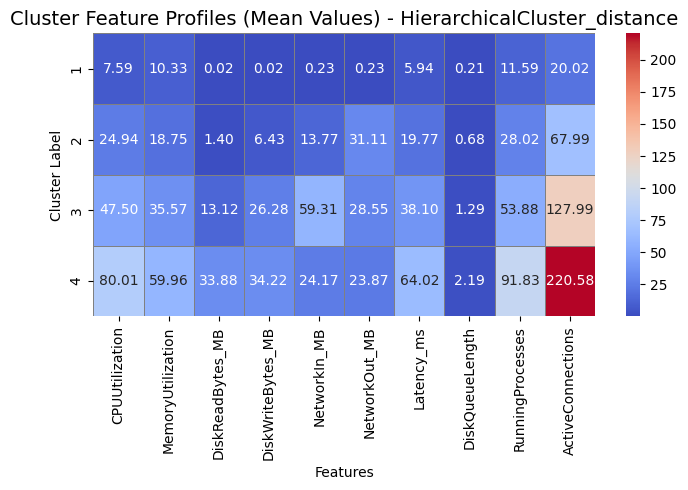

In [37]:
plt.figure(figsize=(7, 5))
sns.heatmap(
    cluster_profile_hier2,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Cluster Feature Profiles (Mean Values) - HierarchicalCluster_distance', fontsize=14)
plt.ylabel('Cluster Label')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

### Hierarchial Clustering using Average method

In [38]:
from scipy.cluster.hierarchy import linkage
linkage_matrix_avg = linkage(scaled_data, method='average')

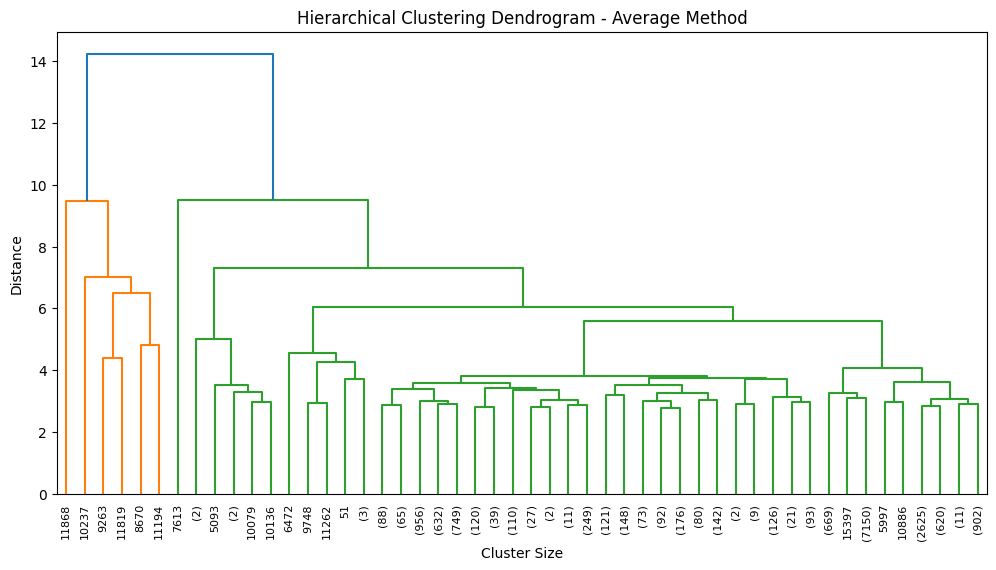

In [39]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix_avg, truncate_mode='lastp', p=50)
plt.title('Hierarchical Clustering Dendrogram - Average Method')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [40]:
from scipy.cluster.hierarchy import fcluster

df['HierarchicalCluster_avg_maxclust'] = fcluster(linkage_matrix, t=4, criterion='maxclust')

In [41]:
cluster_profile_hier_avg1 = df.groupby('HierarchicalCluster_avg_maxclust')[features].mean().round(2)
cluster_profile_hier_avg1

,CPUUtilization,MemoryUtilization,DiskReadBytes_MB,DiskWriteBytes_MB,NetworkIn_MB,NetworkOut_MB,Latency_ms,DiskQueueLength,RunningProcesses,ActiveConnections
HierarchicalCluster_avg_maxclust,,,,,,,,,,
1,7.59,10.33,0.02,0.02,0.23,0.23,5.94,0.21,11.59,20.02
2,24.94,18.75,1.40,6.43,13.77,31.11,19.77,0.68,28.02,67.99
3,47.50,35.57,13.12,26.28,59.31,28.55,38.10,1.29,53.88,127.99
4,80.01,59.96,33.88,34.22,24.17,23.87,64.02,2.19,91.83,220.58


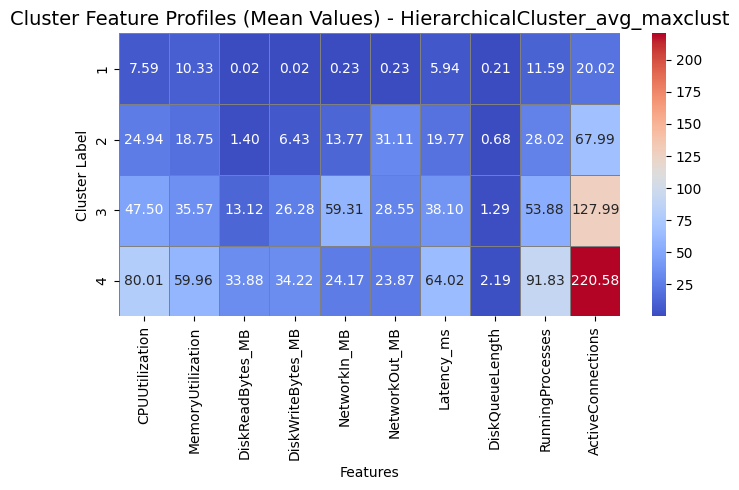

In [42]:
plt.figure(figsize=(7, 5))
sns.heatmap(
    cluster_profile_hier_avg1,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Cluster Feature Profiles (Mean Values) - HierarchicalCluster_avg_maxclust', fontsize=14)
plt.ylabel('Cluster Label')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

### Sub-Clustering using k-means

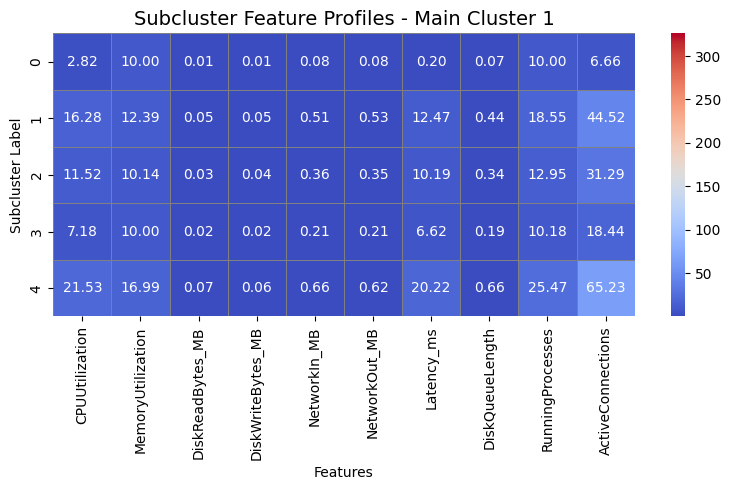

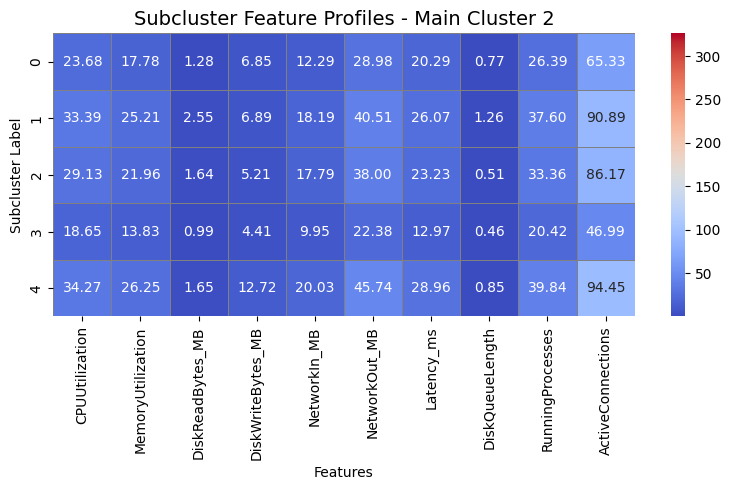

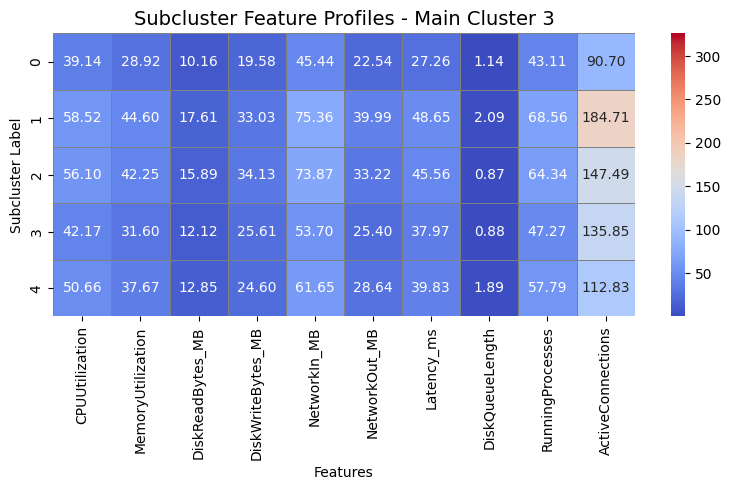

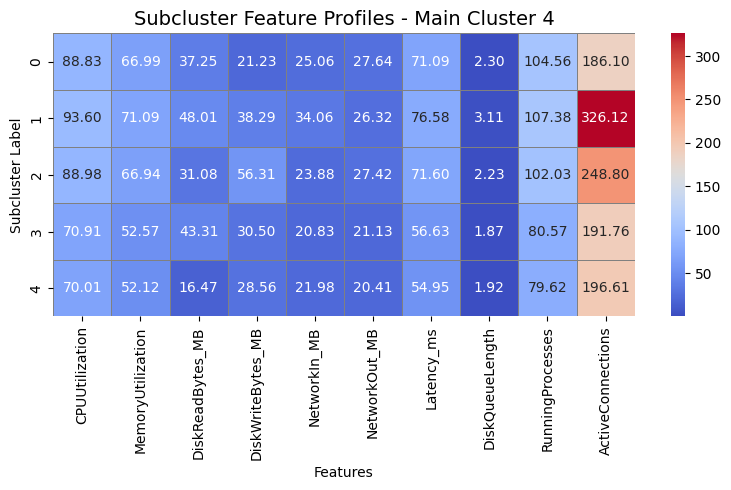

In [43]:
def find_kmeans_subclusters(df, cluster_col, features, n_clusters=3):
    all_profiles = {}
    all_combined = []

    for cluster_id in sorted(df[cluster_col].unique()):
        subset_df = df[df[cluster_col] == cluster_id].copy()
        subset_scaled = scaler.fit_transform(subset_df[features])

        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(subset_scaled)
        subset_df['SubCluster_KMeans'] = labels
        subset_df['MainCluster'] = cluster_id

        profile = subset_df.groupby('SubCluster_KMeans')[features].mean().round(2)
        all_profiles[cluster_id] = profile
        all_combined.append(subset_df)

    return pd.concat(all_combined, axis=0), all_profiles

combined_df_kmeans, subcluster_profiles_kmeans = find_kmeans_subclusters(
    df, cluster_col='HierarchicalCluster_maxclust', features=features, n_clusters=5
)


def plot_subcluster_heatmaps(subcluster_profiles, title_prefix="Subcluster Feature Profiles"):
    # Step 1: Get global min and max
    all_profiles = pd.concat(subcluster_profiles.values())
    vmin = all_profiles.min().min()
    vmax = all_profiles.max().max()

    for main_cluster, profile_df in subcluster_profiles.items():
        plt.figure(figsize=(8, 5))
        sns.heatmap(
            profile_df,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            linecolor='gray',
            vmin=vmin,
            vmax=vmax
        )
        plt.title(f'{title_prefix} - Main Cluster {main_cluster}', fontsize=14)
        plt.ylabel('Subcluster Label')
        plt.xlabel('Features')
        plt.tight_layout()
        plt.show()


# ----------- 6. Visualize -----------
plot_subcluster_heatmaps(subcluster_profiles_kmeans)

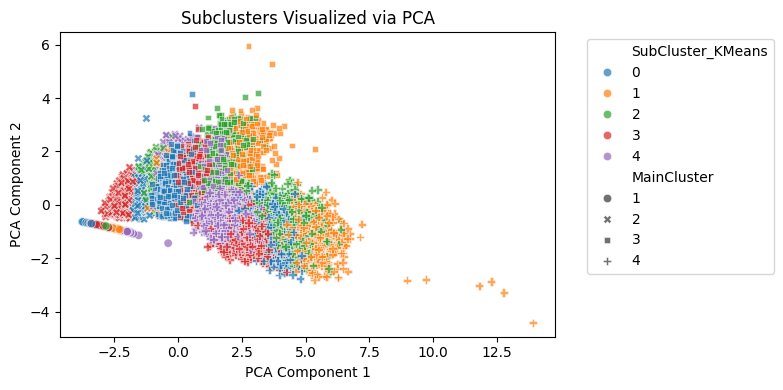

In [47]:
 def visualize_subclusters_pca(df, features, label_col='SubCluster_KMeans', hue_col='MainCluster'):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[features])

    # Apply PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    df['PCA1'] = pca_result[:, 0]
    df['PCA2'] = pca_result[:, 1]

    # Plot PCA scatter with subclusters
    plt.figure(figsize=(8, 4))
    sns.scatterplot(
        data=df,
        x='PCA1', y='PCA2',
        hue=label_col,
        style=hue_col,
        palette='tab10',
        alpha=0.7
    )
    plt.title("Subclusters Visualized via PCA")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

visualize_subclusters_pca(combined_df_kmeans, features)

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_tsne_clusters(df, features, label_col='SubCluster_KMeans', hue_col='MainCluster', perplexity=30):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[features])

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=1000)
    tsne_result = tsne.fit_transform(scaled_data)
    df['TSNE1'] = tsne_result[:, 0]
    df['TSNE2'] = tsne_result[:, 1]

    plt.figure(figsize=(8, 4))
    sns.scatterplot(
        data=df, x='TSNE1', y='TSNE2',
        hue=label_col, style=hue_col,
        palette='tab10', alpha=0.7
    )
    plt.title("t-SNE Visualization of Subclusters")
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


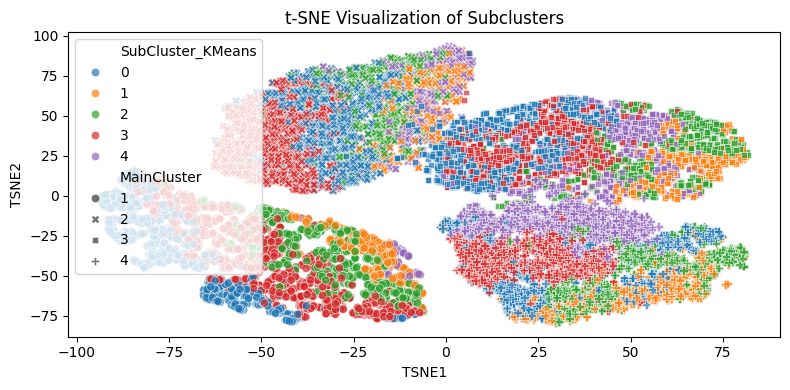

In [53]:
visualize_tsne_clusters(combined_df_kmeans, features)

### Sub-clustering using f-cluster

In [50]:
from scipy.cluster.hierarchy import linkage, fcluster

def find_fcluster_subclusters(df, cluster_col, features, subcluster_t=5):
    all_profiles = {}
    all_combined = []

    scaler = StandardScaler()

    for cluster_id in sorted(df[cluster_col].unique()):
        subset_df = df[df[cluster_col] == cluster_id].copy()
        scaled_subset = scaler.fit_transform(subset_df[features])

        Z = linkage(scaled_subset, method='average')

        sub_labels = fcluster(Z, t=subcluster_t, criterion='maxclust')
        subset_df['SubCluster_Flat'] = sub_labels
        subset_df['MainCluster'] = cluster_id

        profile = subset_df.groupby('SubCluster_Flat')[features].mean().round(2)
        all_profiles[cluster_id] = profile
        all_combined.append(subset_df)

    combined_df = pd.concat(all_combined, axis=0).reset_index(drop=True)
    return combined_df, all_profiles

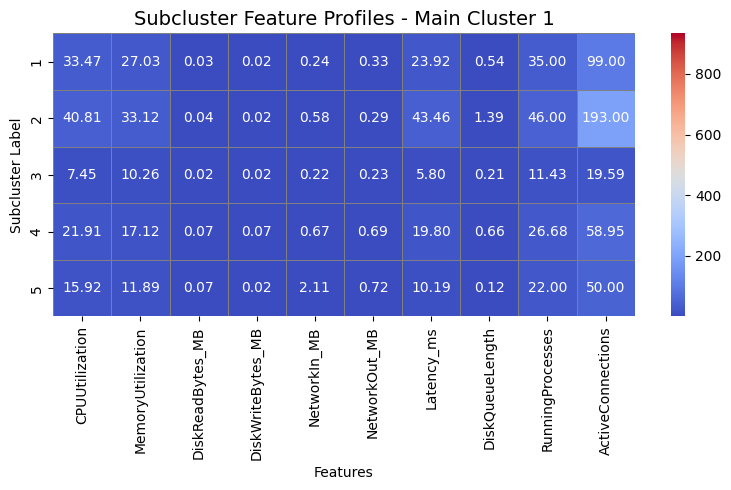

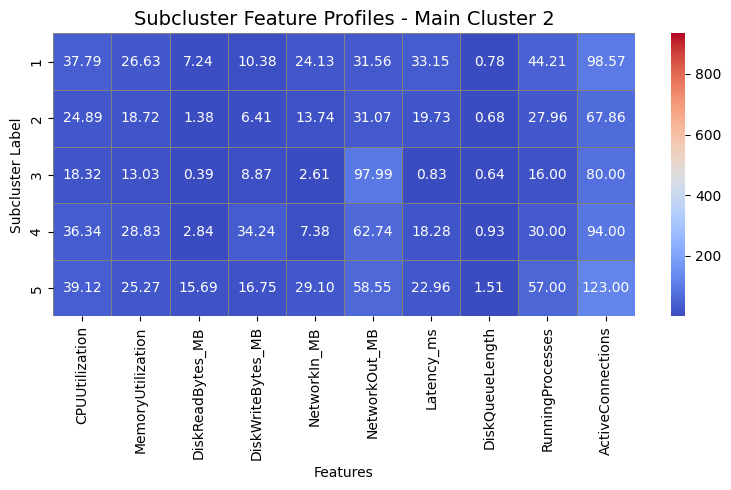

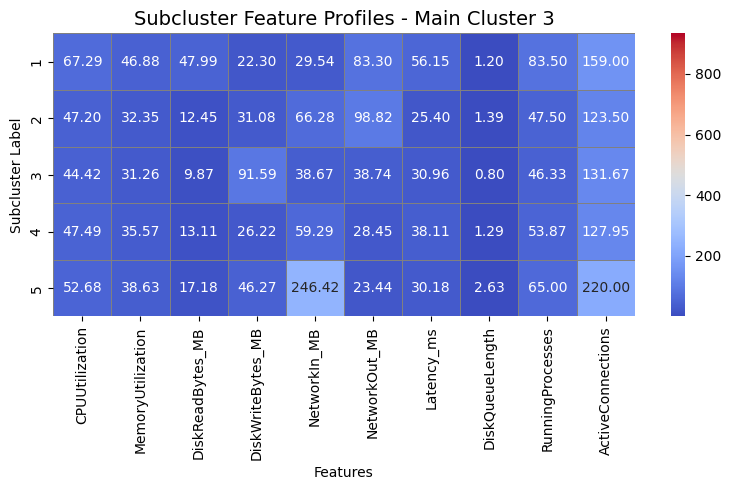

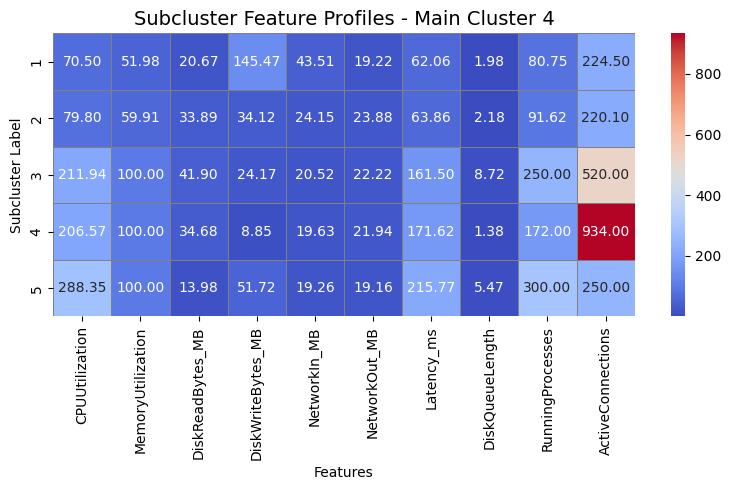

In [51]:
combined_df_flat, subcluster_profiles_flat = find_fcluster_subclusters(
    df, cluster_col='HierarchicalCluster_maxclust', features=features, subcluster_t=5
)

plot_subcluster_heatmaps(subcluster_profiles_flat)